In [3]:
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

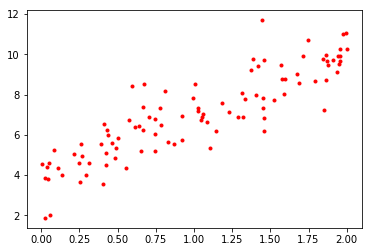

In [9]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.plot(X, y, 'r.')
plt.show()

In [11]:
# Let's use normal equations Y = (X^T X)^{-1} X^T y to solve for missing coefficients

X_b = np.c_[np.ones((100,1)), X] # Add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [13]:
theta_best

array([[3.99776573],
       [3.01255126]])

In [15]:
# That's pretty close to the parameters (4,3) that we had in the original equation.

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # Add x0 = 1 to both instances
y_predict = X_new_b.dot(theta_best)

y_predict

array([[ 3.99776573],
       [10.02286824]])

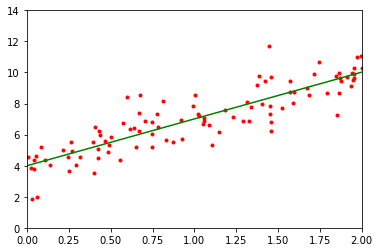

In [20]:
# Let's plot that

plt.plot(X, y, 'r.')
plt.plot(X_new, y_predict, 'g-')
plt.axis([0, 2, 0, 14])
plt.show()

In [22]:
# The same thing using Scikit learn to fit a linear regression model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

lin_reg.predict(X_new)

array([[ 3.99776573],
       [10.02286824]])

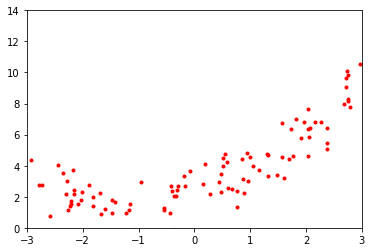

In [24]:
# Polynomial regression

m=100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)


plt.plot(X, y, 'r.')
plt.axis([-3, 3, 0, 14])
plt.show()


In [26]:
# Fitting a polynomial regression line
from sklearn.preprocessing import PolynomialFeatures
# This creates squares of every column given to it
poly_features = PolynomialFeatures(degree=2, include_bias=False)
# Not create X_polynomial from X
X_poly = poly_features.fit_transform(X)


array([-1.81005681,  3.27630565])

In [27]:
# As a example, here's one element
X[0]


array([-1.81005681])

In [28]:
# And that element x along with x^2
X_poly[0]

array([-1.81005681,  3.27630565])

In [29]:
# Now we fit a linear model with this information
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)
# This is the term for the constant.
poly_reg.intercept_

array([2.22894963])

In [30]:
# These are the terms for x, and x^2
poly_reg.coef_


array([[1.0455972 , 0.45950058]])

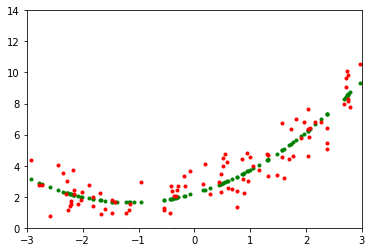

In [36]:
# So the linear regression has actually guessed 2.22 + 1.04*x + 0.45*x^2, which is pretty close
# to the original we had: 2 + 1*x + 0.5*x^2
y_predict = poly_reg.predict(X_poly)
plt.plot(X, y_predict, 'g.')
plt.plot(X, y, 'r.')
plt.axis([-3, 3, 0, 14])
plt.show()

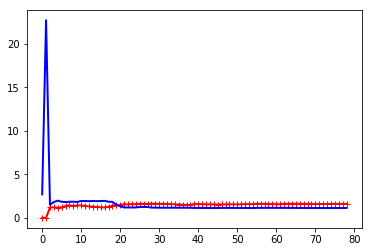

In [38]:
# Learning curves method
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Training")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=2, label="Validation")

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

In [39]:
# Trying to use SGDRegressor on this instead of LinearRegression which uses least squares
poly_features = PolynomialFeatures(degree=5, include_bias=False)
poly_features

PolynomialFeatures(degree=5, include_bias=False, interaction_only=False)

In [42]:
from sklearn.linear_model import SGDRegressor

X_poly = poly_features.fit_transform(X)
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([4.41401122])

In [44]:
# Let's infer a discrete variable now
from sklearn import datasets
iris = datasets.load_iris()

list(iris.keys())


['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [48]:
X = iris["data"]
# This shows you what the columns of 'data' correspond to.
iris['feature_names']


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [51]:
# Petal width is the 4th column, so index 3
X = iris['data'][:, 3:]
X

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.1],
       [0.1],
       [0.2],
       [0.4],
       [0.4],
       [0.3],
       [0.3],
       [0.3],
       [0.2],
       [0.4],
       [0.2],
       [0.5],
       [0.2],
       [0.2],
       [0.4],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.1],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.3],
       [0.3],
       [0.2],
       [0.6],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [1.4],
       [1.5],
       [1.5],
       [1.3],
       [1.5],
       [1.3],
       [1.6],
       [1. ],
       [1.3],
       [1.4],
       [1. ],
       [1.5],
       [1. ],
       [1.4],
       [1.3],
       [1.4],
       [1.5],
       [1. ],
       [1.5],
       [1.1],
       [1.8],
      

In [60]:
y = (iris['target'] == 2).astype(np.int)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [61]:
# Training a logistic model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [65]:
X_new = np.linspace(0, 3, 1000).reshape((-1, 1))
X_new

array([[0.        ],
       [0.003003  ],
       [0.00600601],
       [0.00900901],
       [0.01201201],
       [0.01501502],
       [0.01801802],
       [0.02102102],
       [0.02402402],
       [0.02702703],
       [0.03003003],
       [0.03303303],
       [0.03603604],
       [0.03903904],
       [0.04204204],
       [0.04504505],
       [0.04804805],
       [0.05105105],
       [0.05405405],
       [0.05705706],
       [0.06006006],
       [0.06306306],
       [0.06606607],
       [0.06906907],
       [0.07207207],
       [0.07507508],
       [0.07807808],
       [0.08108108],
       [0.08408408],
       [0.08708709],
       [0.09009009],
       [0.09309309],
       [0.0960961 ],
       [0.0990991 ],
       [0.1021021 ],
       [0.10510511],
       [0.10810811],
       [0.11111111],
       [0.11411411],
       [0.11711712],
       [0.12012012],
       [0.12312312],
       [0.12612613],
       [0.12912913],
       [0.13213213],
       [0.13513514],
       [0.13813814],
       [0.141

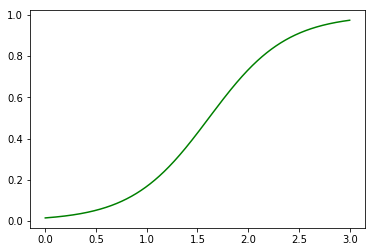

In [66]:
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")

In [67]:
y_proba

array([[0.98552764, 0.01447236],
       [0.98541511, 0.01458489],
       [0.98530171, 0.01469829],
       ...,
       [0.02620686, 0.97379314],
       [0.02600703, 0.97399297],
       [0.02580868, 0.97419132]])

In [ ]:
ny